## 1. Create the following dataset (1 point)

* One column per stock and concept: Open, High, Low, Close, Adj close per stock
* Date as index

Be ready for dealing with errors in the names and some missing values.

In [1]:
import pandas as pd
stockx = pd.read_csv("stocks_unclean.csv")
stockx.head()

,date,variable,value
0,2020-07-14,high_AAPL,9.725500e+01
1,2021-10-22,volume_AMZN,3.139100e+06
2,2021-06-04,volume_MSFT,2.528110e+07
3,2021-06-28,volume_AMZN,2.242800e+06
4,2021-11-23,low_GOOG,NaN


In [2]:
def converttodatetime (a):
    a["date"] = pd.to_datetime(a["date"])
    return a

stockx = converttodatetime(stockx)

In [3]:
stockx['variable'].unique()

array(['high_AAPL', 'volume_AMZN', 'volume_MSFT', 'low_GOOG', 'open_AMZN',
       'volume_AAPL', 'open_MSFT', 'open_AAPL', 'close_GOOG', 'low_AMZN',
       'close_AAPL', 'volume_GOOG', 'open_GOOG', 'high_AMZN', 'low_AAPL',
       'low_MSFT', 'high_MSFT', 'high_GOOG', 'close_AMZN', 'close_MSFT',
       'low_APL', 'high_GOG', nan, 'volume_MST', 'high_AMZ', 'low_AMZ',
       'close_AMZ', 'high_MST', 'open_GOG', 'open_MST', 'close_GOG',
       'high_APL', 'low_GOG', 'close_APL', 'volume_APL', 'open_APL',
       'volume_GOG', 'open_AMZ', 'low_MST', 'volume_AMZ', 'close_MST'],
      dtype=object)

In [4]:
stockx = stockx.replace({'variable' : {'(GOG)' : 'GOOG', '(MST)' : 'MSFT', '_APL' : '_AAPL', '_AMZ\\b' : '_AMZN'}}, regex=True)

In [5]:
stockx.dropna(subset = ['variable'], inplace = True)

In [6]:
stockx['variable'].unique()

array(['high_AAPL', 'volume_AMZN', 'volume_MSFT', 'low_GOOG', 'open_AMZN',
       'volume_AAPL', 'open_MSFT', 'open_AAPL', 'close_GOOG', 'low_AMZN',
       'close_AAPL', 'volume_GOOG', 'open_GOOG', 'high_AMZN', 'low_AAPL',
       'low_MSFT', 'high_MSFT', 'high_GOOG', 'close_AMZN', 'close_MSFT'],
      dtype=object)

In [7]:
stocks = stockx.pivot_table(values = 'value', index = 'date', columns = 'variable')
stocks

variable,close_AAPL,close_AMZN,close_GOOG,close_MSFT,high_AAPL,high_AMZN,high_GOOG,high_MSFT,low_AAPL,low_AMZN,low_GOOG,low_MSFT,open_AAPL,open_AMZN,open_GOOG,open_MSFT,volume_AAPL,volume_AMZN,volume_GOOG,volume_MSFT
date,,,,,,,,,,,,,,,,,,,,
2019-12-31,73.412498,1847.839966,1337.020020,157.699997,73.419998,1853.260010,1338.000000,157.770004,72.379997,1832.229980,1329.084961,156.449997,72.482498,1842.000000,1330.109985,156.770004,100805600.0,2506500.0,961800.0,18369400.0
2020-01-02,75.087502,1898.010010,1367.369995,160.619995,75.150002,1898.010010,1368.140015,160.729996,73.797501,1864.150024,1341.550049,158.330002,74.059998,1875.000000,1341.550049,158.779999,135480400.0,4029000.0,1406600.0,22622100.0
2020-01-03,74.357498,1874.969971,1360.660034,158.619995,75.144997,1886.199951,1372.500000,159.949997,74.125000,1864.500000,1345.543945,NaN,74.287498,1864.500000,1347.859985,158.320007,146322800.0,3764400.0,1186400.0,21116200.0
2020-01-06,74.949997,1902.880005,1394.209961,159.029999,74.989998,1903.689941,1396.500000,159.100006,73.187500,1860.000000,NaN,156.509995,73.447502,1860.000000,1350.000000,157.080002,118387200.0,4061800.0,1732300.0,20813700.0
2020-01-07,74.597504,1906.859985,1393.339966,157.580002,75.224998,1913.890015,1402.989990,159.669998,74.370003,1892.040039,1390.380005,157.320007,74.959999,1904.500000,1397.939941,159.320007,108872000.0,4044900.0,1502700.0,21634100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,166.229996,3125.979980,2713.040039,303.329987,171.080002,3185.000000,2767.989990,313.910004,165.940002,3125.000000,2710.000000,302.700012,170.000000,3175.239990,2738.770020,306.290009,94815000.0,2662100.0,1039800.0,45933900.0
2022-01-20,164.509995,3033.350098,2670.129883,301.600006,169.679993,3160.000000,2758.239990,311.649994,164.179993,3027.020020,2662.889893,301.140015,166.979996,3135.320068,2730.280029,309.070007,91420500.0,3598700.0,1096500.0,35380700.0
2022-01-21,162.410004,2852.860107,2601.840088,296.029999,166.330002,3018.000000,2695.209961,304.109985,162.300003,2841.409912,2600.020020,295.609985,164.419998,2999.000000,2660.239990,302.690002,122501300.0,8164200.0,2087000.0,57118300.0


## 2. Visualize the data (1.5 point)

* Create a 2x2 grid of plots in which you plot the "Open" in green and "Close" in red for each stock (0.5 points)
* Repeat the 2x2 grid but resampling with the weekly average of "Open" and "Close" (0.5 points)
* Add meaningful visualizations of your choice (0.5 point)

In [8]:
stocks.isna().sum()

variable
close_AAPL      7
close_AMZN      4
close_GOOG      7
close_MSFT      2
high_AAPL       8
high_AMZN       6
high_GOOG       2
high_MSFT       2
low_AAPL        8
low_AMZN        4
low_GOOG        2
low_MSFT        3
open_AAPL       8
open_AMZN       3
open_GOOG       2
open_MSFT       4
volume_AAPL    13
volume_AMZN     2
volume_GOOG     7
volume_MSFT     6
dtype: int64

In [9]:
stocks = stocks.interpolate(method="linear", limit_direct='forward')

In [10]:
stocks.isna().sum()

variable
close_AAPL     0
close_AMZN     0
close_GOOG     0
close_MSFT     0
high_AAPL      0
high_AMZN      0
high_GOOG      0
high_MSFT      0
low_AAPL       0
low_AMZN       0
low_GOOG       0
low_MSFT       0
open_AAPL      0
open_AMZN      0
open_GOOG      0
open_MSFT      0
volume_AAPL    0
volume_AMZN    0
volume_GOOG    0
volume_MSFT    0
dtype: int64

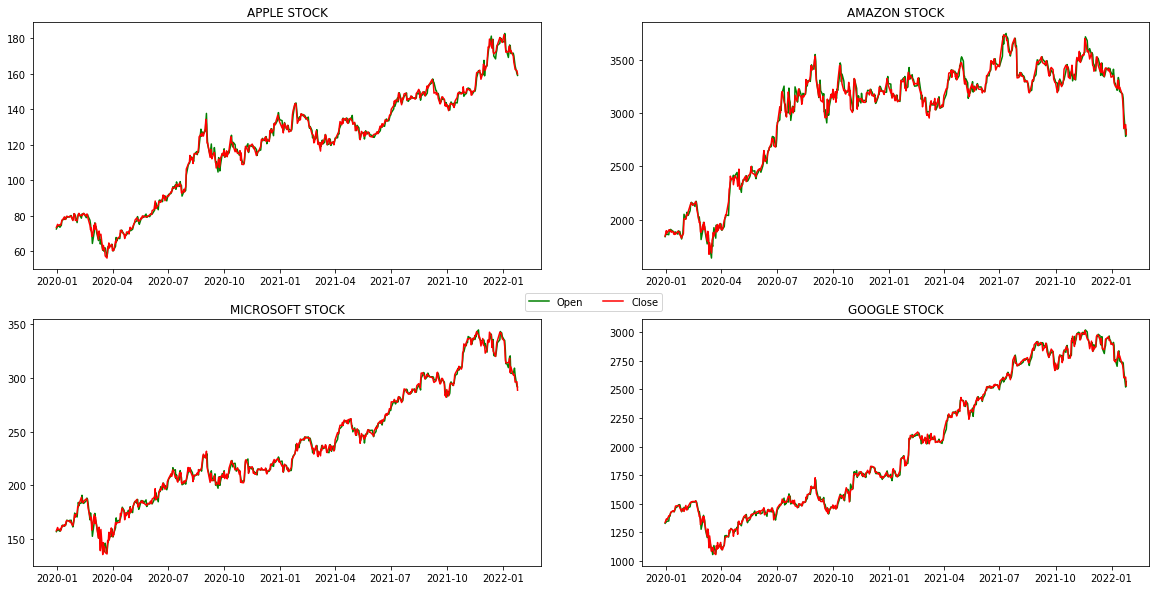

In [11]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

axes[0,0].plot(stocks.index,stocks['open_AAPL'], color = 'green', label = 'Open')
axes[0,0].plot(stocks.index,stocks['close_AAPL'], color = 'red', label = 'Close')
axes[0,0].set_title("APPLE STOCK")

axes[1,0].plot(stocks.index,stocks['open_MSFT'], color = 'green', label = 'Open')
axes[1,0].plot(stocks.index,stocks['close_MSFT'], color = 'red', label = 'Close')
axes[1,0].set_title("MICROSOFT STOCK")

axes[0,1].plot(stocks.index,stocks['open_AMZN'], color = 'green', label = 'Open')
axes[0,1].plot(stocks.index,stocks['close_AMZN'], color = 'red', label = 'Close')
axes[0,1].set_title("AMAZON STOCK")

axes[1,1].plot(stocks.index,stocks['open_GOOG'], color = 'green', label = 'Open')
axes[1,1].plot(stocks.index,stocks['close_GOOG'], color = 'red', label = 'Close')
axes[1,1].set_title("GOOGLE STOCK")

plt.legend(bbox_to_anchor =(0.05, 1.125), ncol = 2);

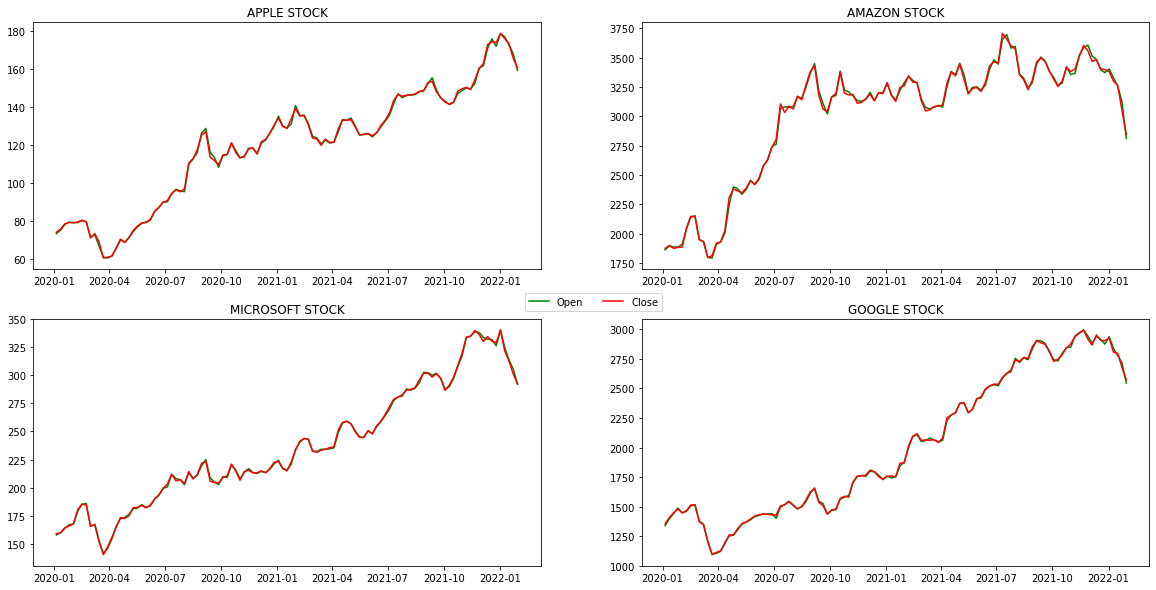

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

axes[0,0].plot(stocks.resample('W').mean().index,stocks['open_AAPL'].resample('W').mean(), color = 'green', label = 'Open')
axes[0,0].plot(stocks.resample('W').mean().index,stocks['close_AAPL'].resample('W').mean(), color = 'red', label = 'Close')
axes[0,0].set_title("APPLE STOCK")

axes[1,0].plot(stocks.resample('W').mean().index,stocks['open_MSFT'].resample('W').mean(), color = 'green', label = 'Open')
axes[1,0].plot(stocks.resample('W').mean().index,stocks['close_MSFT'].resample('W').mean(), color = 'red', label = 'Close')
axes[1,0].set_title("MICROSOFT STOCK")

axes[0,1].plot(stocks.resample('W').mean().index,stocks['open_AMZN'].resample('W').mean(), color = 'green', label = 'Open')
axes[0,1].plot(stocks.resample('W').mean().index,stocks['close_AMZN'].resample('W').mean(), color = 'red', label = 'Close')
axes[0,1].set_title("AMAZON STOCK")

axes[1,1].plot(stocks.resample('W').mean().index,stocks['open_GOOG'].resample('W').mean(), color = 'green', label = 'Open')
axes[1,1].plot(stocks.resample('W').mean().index,stocks['close_GOOG'].resample('W').mean(), color = 'red', label = 'Close')
axes[1,1].set_title("GOOGLE STOCK")

plt.legend(bbox_to_anchor =(0.05, 1.125), ncol = 2);

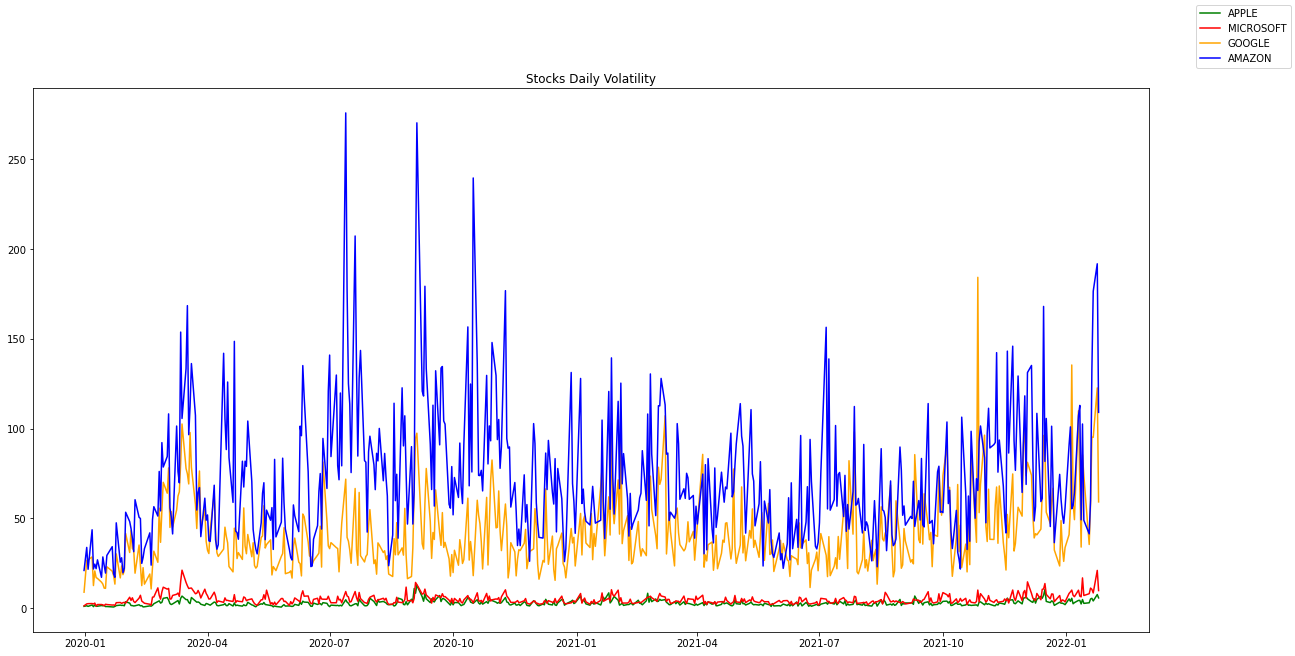

In [13]:
fig, axes = plt.subplots(figsize=(20, 10))

axes.plot(stocks.index,stocks['high_AAPL']-stocks['low_AAPL'], color = 'green', label = 'APPLE')
axes.plot(stocks.index,stocks['high_MSFT']-stocks['low_MSFT'], color = 'red', label = 'MICROSOFT')
axes.plot(stocks.index,stocks['high_GOOG']-stocks['low_GOOG'], color = 'orange', label = 'GOOGLE')
axes.plot(stocks.index,stocks['high_AMZN']-stocks['low_AMZN'], color = 'blue', label = 'AMAZON')

fig.legend()
axes.set_title('Stocks Daily Volatility');

## 3. Create a function that calculates the Return of Investment (ROI) (1 point)

Let's suppose you buy one stock one day, you hold it for N days (lookback period) and after N days you sell it.

$$ ROI = \frac{FVI - IVI}{IVI} * 100$$

* IVI: initial value of investment. This is the price at which you bought the stock
* FVI: final value of investment. This is the price at which you sold the stock
* ROI: Return of Investment. This is the percentage of increase in value of the investment

Now that we know how to calculate the ROI, create a function in Python that receives as parameters the following:
* lookback: the number of days you hold the stock
* name: the name of the stock, using the "Close" value of the stock
* data: the dataframe with the stock data

In [14]:
def ROI(lookback, name, data):
    fvi = data['close_{}'.format(name)]
    ivi = data['close_{}'.format(name)].shift(lookback)
    roi = (fvi - ivi)*100/ivi
    return roi

In [15]:
ROI(100,'AMZN',stocks)

date
2019-12-31          NaN
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
                ...    
2022-01-19    -5.730399
2022-01-20    -9.442231
2022-01-21   -16.621316
2022-01-24   -16.708304
2022-01-25   -19.525152
Name: close_AMZN, Length: 522, dtype: float64

## 4. Apply the roi function to the portfolio (1.5 point)

Create as many ROI columns as different stocks you have in the portfolio and plot them in a 2x2 grid, representing for each stock:
* ROI after holding the stock for 365 days (red, dashed line) (0.5 points)
* ROI after holding the stock for 180 days (blue, dotted line) (0.5 points)
* ROI after holding the stock for 90 days (green, solid line) (0.5 points)

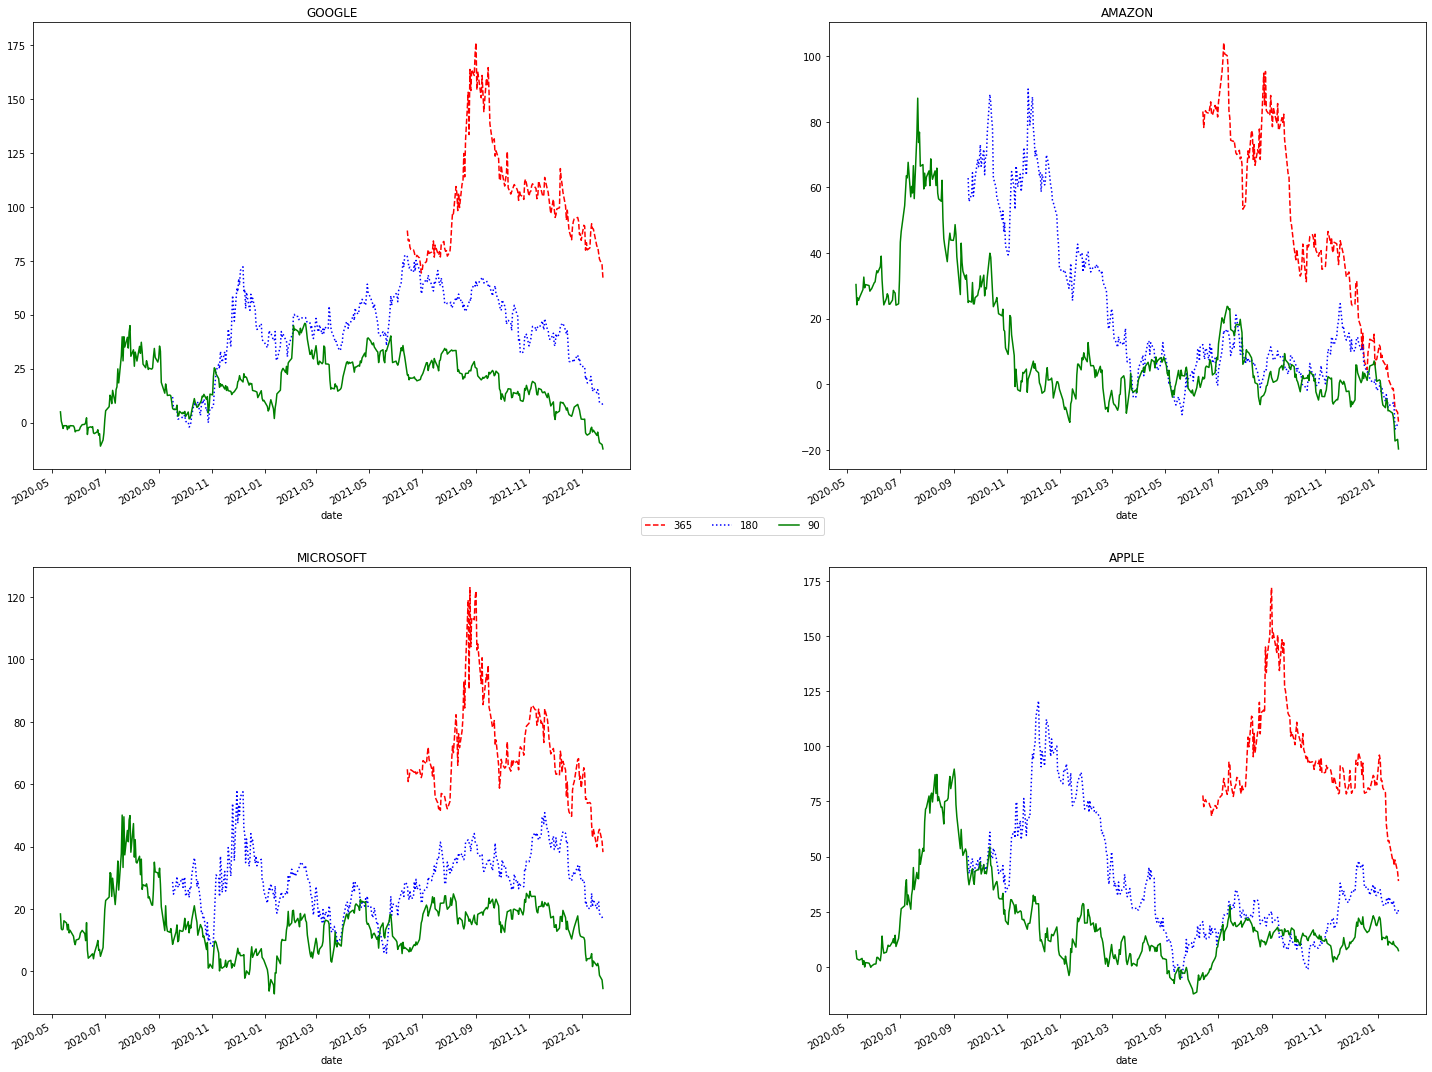

In [16]:
fig, ax = plt.subplots(2,2,figsize=(20, 15))

ROI(365,'GOOG',stocks).plot(ax=ax[0,0],color='red',label='365',ls='--')
ROI(365,'AMZN',stocks).plot(ax=ax[0,1],color='red',label='365',ls='--')
ROI(365,'MSFT',stocks).plot(ax=ax[1,0],color='red',label='365',ls='--')
ROI(365,'AAPL',stocks).plot(ax=ax[1,1],color='red',label='365',ls='--')

ROI(180,'GOOG',stocks).plot(ax=ax[0,0],color='blue',label='180',ls=':')
ROI(180,'AMZN',stocks).plot(ax=ax[0,1],color='blue',label='180',ls=':')
ROI(180,'MSFT',stocks).plot(ax=ax[1,0],color='blue',label='180',ls=':')
ROI(180,'AAPL',stocks).plot(ax=ax[1,1],color='blue',label='180',ls=':')

ROI(90,'GOOG',stocks).plot(ax=ax[0,0],color='green',label='90')
ROI(90,'AMZN',stocks).plot(ax=ax[0,1],color='green',label='90')
ROI(90,'MSFT',stocks).plot(ax=ax[1,0],color='green',label='90')
ROI(90,'AAPL',stocks).plot(ax=ax[1,1],color='green',label='90')

ax[0,0].set_title('GOOGLE')
ax[0,1].set_title('AMAZON')
ax[1,0].set_title('MICROSOFT')
ax[1,1].set_title('APPLE')
plt.legend(bbox_to_anchor =(0.0, 1.125), ncol = 3);
plt.tight_layout();

## 5. Optimizing portfolio (1 point)

Given these two portfolios, which one has the best ROI? Keep in mind that ROI is a percentage and you can't average it directly -- you need to convert the ROI to a return in currency by multiplying it by the buy price, and then average that over the period.

* Portfolio 1:
    * AAPL 40%
    * GOOG 30%
    * MSFT 20%
    * AMZN 10%


* Portfolio 2:
    * AAPL 30%
    * GOOG 20%
    * MSFT 10%
    * AMZN 40%

In [17]:
stocks_copy = stocks.copy()

In [18]:
stocks_copy['ROI_365_AAPL'] = stocks_copy['close_AAPL'].shift(365)*ROI(365,'AAPL',stocks)/100
stocks_copy['ROI_365_AMZN'] = stocks_copy['close_AMZN'].shift(365)*ROI(365,'AMZN',stocks)/100
stocks_copy['ROI_365_GOOG'] = stocks_copy['close_GOOG'].shift(365)*ROI(365,'GOOG',stocks)/100
stocks_copy['ROI_365_MSFT'] = stocks_copy['close_MSFT'].shift(365)*ROI(365,'MSFT',stocks)/100

stocks_copy['ROI_180_AAPL'] = stocks_copy['close_AAPL'].shift(180)*ROI(180,'AAPL',stocks)/100
stocks_copy['ROI_180_AMZN'] = stocks_copy['close_AMZN'].shift(180)*ROI(180,'AMZN',stocks)/100
stocks_copy['ROI_180_GOOG'] = stocks_copy['close_GOOG'].shift(180)*ROI(180,'GOOG',stocks)/100
stocks_copy['ROI_180_MSFT'] = stocks_copy['close_MSFT'].shift(180)*ROI(180,'MSFT',stocks)/100

stocks_copy['ROI_90_AAPL'] = stocks_copy['close_AAPL'].shift(90)*ROI(90,'AAPL',stocks)/100
stocks_copy['ROI_90_AMZN'] = stocks_copy['close_AMZN'].shift(90)*ROI(90,'AMZN',stocks)/100
stocks_copy['ROI_90_GOOG'] = stocks_copy['close_GOOG'].shift(90)*ROI(90,'GOOG',stocks)/100
stocks_copy['ROI_90_MSFT'] = stocks_copy['close_MSFT'].shift(90)*ROI(90,'MSFT',stocks)/100

In [19]:
apple_365_return = stocks_copy['ROI_365_AAPL'].mean()
amazon_365_return = stocks_copy['ROI_365_AMZN'].mean()
google_365_return = stocks_copy['ROI_365_GOOG'].mean()
microsoft_365_return = stocks_copy['ROI_365_MSFT'].mean()

apple_180_return = stocks_copy['ROI_180_AAPL'].mean()
amazon_180_return = stocks_copy['ROI_180_AMZN'].mean()
google_180_return = stocks_copy['ROI_180_GOOG'].mean()
microsoft_180_return = stocks_copy['ROI_180_MSFT'].mean()

apple_90_return = stocks_copy['ROI_90_AAPL'].mean()
amazon_90_return = stocks_copy['ROI_90_AMZN'].mean()
google_90_return = stocks_copy['ROI_90_GOOG'].mean()
microsoft_90_return = stocks_copy['ROI_90_MSFT'].mean()

In [20]:
portfolio_1_365 = apple_365_return*0.4 + google_365_return*0.3 + microsoft_365_return*0.2 + amazon_365_return*0.1
portfolio_1_180 = apple_180_return*0.4 + google_180_return*0.3 + microsoft_180_return*0.2 + amazon_180_return*0.1
portfolio_1_90 = apple_90_return*0.4 + google_90_return*0.3 + microsoft_90_return*0.2 + amazon_90_return*0.1

In [21]:
portfolio_2_365 = apple_365_return*0.3 + google_365_return*0.2 + microsoft_365_return*0.1 + amazon_365_return*0.4
portfolio_2_180 = apple_180_return*0.3 + google_180_return*0.2 + microsoft_180_return*0.1 + amazon_180_return*0.4
portfolio_2_90 = apple_90_return*0.3 + google_90_return*0.2 + microsoft_90_return*0.1 + amazon_90_return*0.4

In [22]:
if portfolio_1_365 > portfolio_2_365:
    print('Portfolio 1 had better return over 365 days')
else:
    print('Portfolio 2 had better return over 365 days')

Portfolio 2 had better return over 365 days


In [23]:
if portfolio_1_180 > portfolio_2_180:
    print('Portfolio 1 had better return over 180 days')
else:
    print('Portfolio 2 had better return over 180 days')

Portfolio 2 had better return over 180 days


In [24]:
if portfolio_1_90 > portfolio_2_90:
    print('Portfolio 1 had better return over 90 days')
else:
    print('Portfolio 2 had better return over 90 days')

Portfolio 2 had better return over 90 days


## 6. Find a better combination in your portfolio (1 point)

The new combination should beat the best portfolio that you found in the previous exercise.

In [25]:
#Portfolio_3: Apple 10%, Google 50%, Microsoft 10%, Amazon 30%
portfolio_3_365 = apple_365_return*0.1 + google_365_return*0.5 + microsoft_365_return*0.1 + amazon_365_return*0.3
portfolio_3_180 = apple_180_return*0.1 + google_180_return*0.5 + microsoft_180_return*0.1 + amazon_180_return*0.3
portfolio_3_90 = apple_90_return*0.1 + google_90_return*0.5 + microsoft_90_return*0.1 + amazon_90_return*0.3

In [26]:
if portfolio_3_365 > portfolio_2_365:
    print('Portfolio 3 had better return over 365 days')
else:
    print('Portfolio 2 had better return over 365 days')

Portfolio 3 had better return over 365 days


In [27]:
if portfolio_3_180 > portfolio_2_180:
    print('Portfolio 3 had better return over 180 days')
else:
    print('Portfolio 2 had better return over 180 days')

Portfolio 3 had better return over 180 days


In [28]:
if portfolio_3_90 > portfolio_2_90:
    print('Portfolio 3 had better return over 90 days')
else:
    print('Portfolio 2 had better return over 90 days')

Portfolio 3 had better return over 90 days
